Mariana Gómez Cuartas \
Universidad de Antioquia

<a href="https://colab.research.google.com/github/marianagomezcuartas/Relatividad/blob/main/codigos/cuaderno2(1.3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Librerías

In [3]:
%pip install -q numpy matplotlib celluloid IPython ipywidgets pandas

Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from celluloid import Camera
from IPython.display import HTML
from ipywidgets import interact
import pandas as pd

In [5]:
plt.rcParams.update({'font.size': 14})

# Capítulo 1.3: consecuencias de las transformaciones de Lorentz (pp. 24-30)


En esta sección vamos a estudiar lo que ven diferentes observadores en cuanto a la tasa en la que se modifican los relojes, la longgitud de cuerdas y la simultaneidad de eventos.

## Dilatación termporal

Una de las consecuencias más destacadas de la relatividad especial es que los relojes en movimiento avanzan más lentamente que los relojes en reposo; es decir, cualquier observador incercial va observar que los relojes usados por otro observador incercial, en movimiento uniforme relativo a él, avanzan más lentamente que los suyos. 

Particularmente, si un observador A tiene un reloj en reposo y otro observador B tiene un reloj en movimiento uniforme respecto al primero, el observador A va a medir que el reloj de B avanza más lentamente que su propio reloj; pero si el observador B hace una medición, él verá que el reloj de A avanza más lentamente que el suyo. Ambos estarán en lo correcto, y la razón es que el tiempo no es absoluto. 

Vamos a considerar particulas de laboratorio para explicar este problema. Una partícula de corta vida es considerada puntual, talque en un evento **1** es creada y en un evento **2** decae. El intervalo de tiempo entre estos dos eventos, medido en un marco de referencia incercial, es el tiempo de vida de la partícula.


Consideremos el tiempo de vida de una partícula observado por los observadores incerciales O y O'. 

- El observador O usa un marco de referencia S, el cual es el marco de referencia de laboratorio, en el cual la partícula viaja con una velocidad constante V en la dirección x+. 

- El observador O' usa un marco de referencia S' que se mueve con la partícula. Este es conocido con el marco de referencia en reposo.

En la siguen animación se ilustran los marcos de referencia S y S' asociados con el movimiento de la partícula.

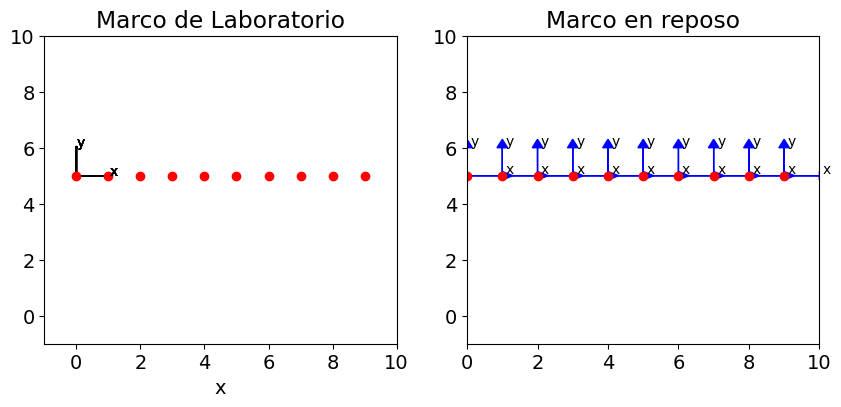

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from celluloid import Camera

V = 1.0         # Velocidad de la partícula
x_max = 10      # Límite del eje x
frames = 10

# Setup de la figura con 2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
camera = Camera(fig)

for t in range(frames):
    x = V * t   # posición de la partícula

    # === Subplot 1 ===
    ax1.set_xlim(0, x_max)
    ax1.set_ylim(-1, 10)
    ax1.set_xlabel("x")
    ax1.set_title("Marco de Laboratorio")
    ax1.set_xlim(-1, 10)
    ax1.set_ylim(-1, 10)
    ax1.plot(x, 5, 'ro')  # partícula

    # Ejes fijos 
    ax1.arrow(0, 5, 1, 0, head_width=0.05, head_length=0.1, fc='black', ec='black')
    ax1.arrow(0, 5, 0, 1, head_width=0.05, head_length=0.05, fc='black', ec='black')
    ax1.text(1.05, 5, 'x', fontsize=10)
    ax1.text(0, 6.05, 'y', fontsize=10)

    # === Subplot 2 ===
    ax2.set_xlim(0, x_max)
    ax2.set_ylim(-1, 10)
    ax2.set_title("Marco en reposo")

    ax2.plot(x, 5, 'ro')  #partícula
    ax2.arrow(x, 5, 1, 0, head_width=0.3, head_length=0.3, fc='blue', ec='blue')  # eje x'
    ax2.arrow(x, 5, 0, 1, head_width=0.3, head_length=0.3, fc='blue', ec='blue')  # eje y'
    ax2.text(x+1.1, 5.1, 'x', fontsize=10)
    ax2.text(x+0.1, 6.1, 'y', fontsize=10)
    
    camera.snap()


In [27]:
animation = camera.animate(interval=500, repeat=False)
HTML(animation.to_jshtml())

De acuerdo con el observador O' el nacimiento y decaimiento de la partícula (estacionaria), ocurre en el mismo lugar; es decir, el evento 1 ocurre en las coordenadas (t1', x') y el evento 2 ocurre en las coordenadas (t2', x'). Por lo tanto, el intervalo de tiempo entre los eventos 1 y 2 es la diferencia entre los tiempos de los eventos 1 y 2, medidos por el observador O' (que está en reposo con respecto a la partícula). 

Este es el que se conoce como el tiempo de vida de la partícula, y viene dado por:
$$\Delta t' = t_2' - t_1'$$

En relatividad especial, el tiempo entre dos eventos medidos en un marco tal que el evento ocurre en el mismo lugar es conocido como el **tiempo propio**, y se denota como $\Delta \tau$.

Entonces, para este ejemplo particular, en el marco S', el intervalo de tiempo y espacio que separa a los eventos 1 y 2 es:
$$\Delta t' = \Delta \tau = t_2' - t_1' $$
$$\Delta x' = x_2' - x_1' = 0$$

Ahora bien, de acuerdo con el observador O, el evento 1 ocurre en las coordenadas (t1, x1) y el evento 2 ocurre en las coordenadas (t2, x2). Por lo tanto, el intervalo de tiempo y espacio entre los eventos 1 y 2 es:

$$\Delta T = \Delta t = t_2 - t_1$$
$$\Delta x = x_2 - x_1$$


Estos eventos e intervalos se pueden representar por medio del siguiente gráfico:

(observación: para mejorar la forma en la que se visualiza el gráfico y las etiquetas de los ejes se hizo uso de chatGPT))

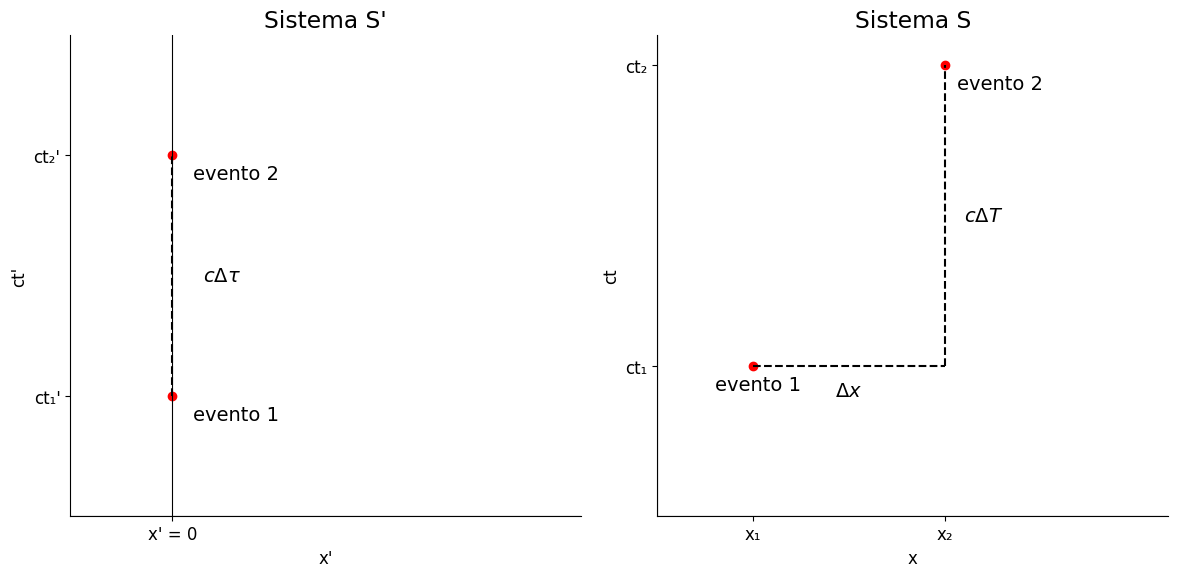

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Parámetros de Lorentz
v = 0.6   # velocidad en unidades de c
c=1
gamma = 1 / np.sqrt(1 - v**2/c**2)

# Sistema S' (todos los eventos en x' = 0)
x_prime = 0
ct1_prime = 2
ct2_prime = 6

# Transformaciones de Lorentz → Sistema S
x1 = gamma * (x_prime + v * ct1_prime/c)
x2 = gamma * (x_prime + v * ct2_prime/c)
ct1 = gamma * (ct1_prime + v * x_prime/c**2)
ct2 = gamma * (ct2_prime + v * x_prime/c**2)

# Crear figura con 2 subplots lado a lado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# ================== Sistema S' ==================
ax = ax1
ax.set_xlim(-1, 4)
ax.set_ylim(0, 8)
ax.set_xticks([x_prime])
ax.set_xticklabels(["x' = 0"], fontsize=12)
ax.set_yticks([ct1_prime, ct2_prime])
ax.set_yticklabels(["ct₁'", "ct₂'"], fontsize=12)
ax.set_title("Sistema S'")

# Eventos
ax.plot(x_prime, ct1_prime, 'ro')
ax.plot(x_prime, ct2_prime, 'ro')

# Línea vertical
ax.plot([x_prime, x_prime], [ct1_prime, ct2_prime], 'k--')

# Etiquetas
ax.text(x_prime + 0.3, (ct1_prime + ct2_prime)/2, r'$c\Delta \tau$', va='center')
ax.text(x_prime + 0.2, ct1_prime - 0.4, 'evento 1')
ax.text(x_prime + 0.2, ct2_prime - 0.4, 'evento 2')

# Ejes
ax.axhline(0, color='black', linewidth=0.8)
ax.axvline(0, color='black', linewidth=0.8)
ax.set_xlabel("x'", fontsize=12)
ax.set_ylabel("ct'", fontsize=12)

# ================== Sistema S ==================
ax = ax2
ax.set_xlim(0, 8)
ax.set_ylim(0, 8)
ax.set_xticks([x1, x2])
ax.set_xticklabels(['x₁', 'x₂'], fontsize=12)
ax.set_yticks([ct1, ct2])
ax.set_yticklabels(['ct₁', 'ct₂'], fontsize=12)
ax.set_title("Sistema S")

# Eventos
ax.plot(x1, ct1, 'ro')
ax.plot(x2, ct2, 'ro')

# Líneas punteadas
ax.plot([x1, x2], [ct1, ct1], 'k--')  # Δx
ax.plot([x2, x2], [ct1, ct2], 'k--')  # cΔT

# Etiquetas
ax.text((x1 + x2)/2, ct1 - 0.5, r'$\Delta x$', ha='center')
ax.text(x2 + 0.3, (ct1 + ct2)/2, r'$c\Delta T$', va='center')
ax.text(x1 - 0.6, ct1 - 0.4, 'evento 1')
ax.text(x2 + 0.2, ct2 - 0.4, 'evento 2')

# Ejes
ax.axhline(0, color='black', linewidth=0.8)
ax.axvline(0, color='black', linewidth=0.8)
ax.set_xlabel("x", fontsize=12)
ax.set_ylabel("ct", fontsize=12)

# Limpieza de bordes extra
for a in (ax1, ax2):
    a.spines['top'].set_visible(False)
    a.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


Ahora bien, recordamos de la sección anterior la ecuación: 

$$\Delta t = \gamma \left( \Delta t' + \frac{V}{c^2} \Delta x' \right)$$

Esta expresión involucra tres intervalos conocidos: $\Delta t$, $\Delta t'$, y $\Delta x'$, con lo cual podemos reemplazar y obtener:

$$\Delta T = \gamma \left( \Delta \tau + \frac{V}{c^2} \cdot 0 \right)$$

es decir,

$$\Delta T = \gamma \Delta \tau$$